<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:**  Espinosa García Lyha, Navarro Valencia Dayana, Vazquez Vargas Ana Cristina 

**Fecha:** 19 de Marzo del 2021.

**Expediente** : 721470 , 721861 , 721215

**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/ACristinaVV/Proyecto_Avocado.git



# <center> ![Proyecto SPF](avocado.jpg) Proyecto SPF
    

### 1.1 Simulación Montecarlo aplicada a las ventas de aguacates.
  


### 1.2 Objetivos.
> #### 1.1 Objetivo general.
>  - Proyectar los diferentes escenarios relacionados con las ventas de aguacates. 

> #### 1.2 Objetivos específicos
>  - Aplicar simulación montecarlo para conocer la mejor temporada para vender aguacates.   
>  - Encontrar por medio de las simulaciones el tipo de aguacate que es más conveniente vender.   
>  - Estimar y proyectar el precio promedio de una pieza de aguacate.   
>  - Analizar el comportamiento de las ventas totales.  


### 1.3 Definición del problema.

Considerada la estrella del campo mexicano, el aguacate es uno de los frutos preferidos de la cocina internacional. Países como Estados Unidos, Canadá, China y la Unión Europea son grandes consumidores de aguacate. Para estimar la importancia en el mundo de este alimento, el Servicio Nacional de Sanidad, Inocuidad y Calidad Agroalimentaria (SENASICA) estima que en el mundo 1 de cada 3 aguacates se cosechan en México.

Los productores nacionales apuestan al mercado americano ya que es su principal comprador a nivel internacional. Es por esto que la base de datos que encontramos nos pareció interesante y de gran utilidad puesto que en base a ella simularemos el comportamiento de este producto en el mercado, y que mejor referente que su principal consumidor.  

El escenario que deseamos proyectar es el de las ventas de aguacates en Estados Unidos basándonos en la información que proporcionaba nuestra base de datos.

Nuestro propósito con este proyecto es analizar la base de datos, obtener su función de probabilidad, aplicar simulación montecarlo y dar una opinión informada a un inversionista en este negocio. 

Las variables (columnas) que utilizaremos para este estudio son: Fecha, Ventas totales, Precio promedio, Ventas por tipo. 



### 1.4 Nodos y variables que se decidieron simular y porqué
Para este proyecto en particular los nodos que hemos decidido simular son: 
> - Ventas totales   
> - Temporalidad   
> - Precio promedio  
> - Clasificación     

El objetivo de simular las **ventas totales** es analizar como fluctua el volumen de ventas. Lo que esperamos es proyectar las ventas de aguacate para el próximo año. 

Al simular la **temporalidad** podemos obtener cual es la temporada en la que se espera mayor cantidad de ventas totales 

Decidimos simular el **precio promedio** debido a que de esta manera podemos conocer su comportamiento, que tan volátil es, así como cual es la probabilidad de que el precio del aguacate suba a más de 2 dólares por unidad

Con la simulaciones de la **clasificación** de los aguacates buscamos encontrar cuál tipo es el que se espera que tenga mayores ventas, esto nos sirve para identificar el mercado más próspero.    

#### Esquema 



<img src="AVOCADO.png">

### 1.5 Definición de hipótesis y supuestos.

#### Supuestos:

- Suponemos que los datos presentado son reales
- Si se realiza un negocio será dentro de condiciones regulares
- La información presentada es correcta y confiable
- Como moneda se utilizará el dolar estadounidense
- Las variables decididas son las mejores variables para modelar el comportamiento de las ventas de aguacate

#### Hipótesis

- La venta de aguacate tiene cierta temporalidad (Altas ventas de Octubre a Enero), no obstante el producto se oferta constantemente durante todo el año. 

- El precio fluctúa dependiendo de la temporada

- El tipo de aguacate más popular es el 4225-Large Hass 

### 1.6 Obtencion Base de Datos

La base de datos a utilizar la obtivimos de la plataforma Kaggle, la cual ofrece una amplia cantidad de data sets para su posterior análisis. 
Fue en esta página que encontramos información sobres las ventas de aguacates.
La base de datos se compone de los siguientes
 • Año
 • fecha de la observación semanal
 • Ventas totales
 • Precio Promedio
 • Ventas por tipo de aguacate 
 • Ventas por tipo de bolsa 
 
 La base de datos con la que contamos nos ofrece información semanal sobre:
> - Ventas totales: la cantidad de piezas de aguacate vendidas en total.   
> - Ventas por tipo de aguacate:  la cantidad de piezas vendidas por cada tipo de aguacate (4046 - Small Hass, 4225 - Large Hass, 4770 - Extra large Hass)   
> - Ventas por tipo de bolsas: el total de bolsas vendidas (Small / Large)   
> - Precio promedio: el precio promedio por pieza de aguacate (sin importar el tipo)    
> - Fecha: observación por semana   
> - Año: año de la observación    
> - Región: ciudad o región de la observación   
 
La problematica que buscamos solucionar, es darnos una idea clara de como es que funcionan las ventas de aguacates y porque sería un buen producto para invertir

[Liga a la base de datos](https://www.kaggle.com/neuromusic/avocado-prices)



In [1]:
import pandas as pd

data = pd.read_csv('BaseDatos.csv')

data.set_index('Date', inplace=True)
data.head()

,Week,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
27/12/2015,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
20/12/2015,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
13/12/2015,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
06/12/2015,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
29/11/2015,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### BASE DE DATOS LIMPIA

In [2]:
data.drop(["Total Bags", "Large Bags","XLarge Bags", 'type', 'year'], axis = 1, inplace = True) 

In [3]:
data = data.rename(columns={'4225':'Large Hass','4046':'Small Hass', '4770':'Extra Large Hass'})
data.head()

,Week,AveragePrice,Total Volume,Small Hass,Large Hass,Extra Large Hass,Small Bags,region
Date,,,,,,,,
27/12/2015,0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,Albany
20/12/2015,1,1.35,54876.98,674.28,44638.81,58.33,9408.07,Albany
13/12/2015,2,0.93,118220.22,794.70,109149.67,130.50,8042.21,Albany
06/12/2015,3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,Albany
29/11/2015,4,1.28,51039.60,941.48,43838.39,75.78,5986.26,Albany


In [5]:
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.stats as st 

In [8]:
def kde_statsmodels_m(x, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return lambda x_grid: kde.pdf(x_grid)


In [15]:
def kde_scipy(x,bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x_grid: kde.evaluate(x_grid)


In [16]:
prices = kde_scipy(data['AveragePrice'])
prices

<function __main__.kde_scipy.<locals>.<lambda>(x_grid)>

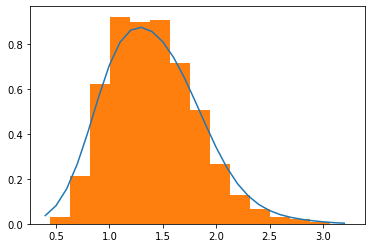

In [33]:
x_precio = np.arange(0.40,3.30,.10)
plt.figure()
plt.plot(x_precio,prices(x_precio));
plt.hist(data['AveragePrice'],bins = 15, density = True);
plt.show()

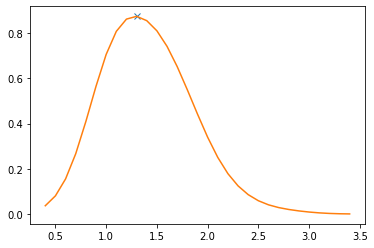

In [46]:
f = prices
x = np.arange(0.40,3.50,.10)

max_precio = f(optimize.fmin(lambda x:-f(x),0,disp=False))

plt.plot(1.30,max_precio,'x',lw = 10)

plt.plot(x,prices(x))



In [57]:
def acep_rechazo_positivos(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar'):
    '''Funcion para hacer el metodo de aceptacion de rechazo especificamente para los datos de covid positivos,
    regresa las variables aleatorias aceptadas'''
    X = np.zeros(N)
    i = 0 
    while i < N:
        R2 = np.random.uniform(0,max_f) 
        R1 = np.random.uniform(0,4,1)

        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X



In [91]:
np.random.seed(123)
N = 1000 # numero de variables que distribuyen como f a generar

# Usar func anteriormente definida como acep_rechazo_aleatorias que genera variables aleatorias
var_aleatorias_montecarlo_prices = acep_rechazo_positivos(f,max_precio,N)
len(var_aleatorias_montecarlo_prices)

1000

In [89]:
#var_aleatorias_montecarlo_prices

In [100]:
print('La media de las variables aleatorias es de', var_aleatorias_montecarlo_prices.mean() )


La media de las variables aleatorias es de 1.38125290898988


In [94]:
print('La media real de nuestros datos es de', data['AveragePrice'].mean() )

La media de las variables aleatorias es de 1.4059784097758825


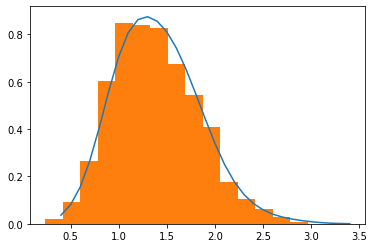

In [93]:
x = np.arange(0.40,3.50,.10)
plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_montecarlo_prices, bins = 15, density = True);
plt.show()

In [103]:
np.random.seed(123)

# Nivel de confianza
confianza = 0.95
X = var_aleatorias_montecarlo_prices

i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))

media_prices = np.mean(X)


print('Con una confianza de %2.2f la media del numero de positivos por montecarlo crudo  estará en el intervalo t normal,\n %s' %(confianza,i1))
print('Media calculada por montecarlo crudo del numero de positivos' ,media_prices)
error_positivos = abs(np.array(data['AveragePrice'].mean() - media_prices)/media_prices)
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', error_positivos*100,'%')

Con una confianza de 0.95 la media del numero de positivos por montecarlo crudo  estará en el intervalo t normal,
 (1.3538741469175464, 1.4086316710622135)
Media calculada por montecarlo crudo del numero de positivos 1.38125290898988
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 1.7900777348649703 %
